In [1]:
import pandas as pd
import numpy as np


responses = pd.read_csv("./form-responses-2024-7-4.csv")
responses.sample()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
20304,4/29/2021 13:37:38,35-44,Education (Higher Education),Vice Chancellor and General Counsel,NaN,"145,000",0.0,USD,NaN,NaN,USA,North Carolina,Asheville,11 - 20 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,White


## Data cleaning and transformation

In [2]:
new_columns = {
    "Timestamp": "timestamp",
    "How old are you?": "age",
    "What industry do you work in?": "industry",
    "Job title": "job_title",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "anual_salary",
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "bonuses",
    "Please indicate the currency": "currency",
    "What country do you work in?": "country",
    "How many years of professional work experience do you have in your field?": "field_experience",
    "What is your highest level of education completed?": "education",
}
responses.rename(columns=new_columns, inplace=True)

In [3]:

responses['bonuses'] = responses['bonuses'].fillna(0)
responses['anual_salary'] = responses['anual_salary'].str.replace(',', '').astype(int)
responses['bonuses'] = responses['bonuses'].astype(int)
responses['timestamp'] = pd.to_datetime(responses['timestamp'])

responses['salary'] = responses['anual_salary'] + responses['bonuses']
responses = responses[responses['salary'] >= 10000]
responses = responses[['timestamp', 'age', 'industry', 'job_title', 'salary', 'currency', 'country', 'field_experience', 'education']]

In [4]:
responses.dropna(subset=['industry', 'job_title'], inplace=True)

def capitalize(title):
    return title.lower().strip()

responses['industry'] = responses['industry'].apply(capitalize)
responses['job_title'] = responses['job_title'].apply(capitalize)
responses['country'] = responses['country'].apply(capitalize)

There are 1003 different values in the industry column. I tried using the Levenshtein Distance algorithm, but it removed valuable information, so I'm going to standardize the values manually and retain only the data that I found relevant

In [5]:
industry_keywords = [
    "Accounting, banking & finance",
    "Agriculture or forestry",
    "Art & design",
    "Business or consulting",
    "Computing or tech",
    "Education (primary/secondary)",
    "Education (higher education)",
    "Engineering or manufacturing",
    "Entertainment",
    "Government and public administration",
    "Health care",
    "Hospitality & events",
    "Insurance",
    "Law",
    "Law enforcement & security",
    "Leisure, sport & tourism",
    "Marketing, advertising & pr",
    "Media & digital",
    "Nonprofits",
    "Property or construction",
    "Recruitment or hr",
    "Retail",
    "Sales",
    "Social work",
    "Transport or logistics",
    "Utilities & telecommunications",

]

industry_keywords_containing = [
    "academia",
    "aerospace",
    "research",
    "architect",
    "auto",
    "biotech",
    "construction",
    "consulting",
    "finance",
    "telecommunications",
    "energy",
    "manufacturing",
    "environment",
    "food",
    "government",
    "health",
    "librari",
    "library",
    "mining",
    "museum",
    "nonprofit",
    "oil",
    "software",
    "pharma",
    "politic",
    "public",
    "publishing",
    "real estate",
    "science",
    "scienti",
    "vet",
]


industry_keyword_set = set(industry_keywords)
industry_keyword_containing_set = set(industry_keywords_containing)


def replace_with_keywords(value, keyword_set, keyword_containing_set):

    for keyword in keyword_set:
        if value.lower().startswith(keyword.lower()):
            return keyword.capitalize()

    for keyword in keyword_containing_set:
        if keyword.lower() in value.lower():
            return keyword.capitalize()

    return np.NaN


responses["industry"] = responses["industry"].apply(
    lambda x: replace_with_keywords(x, industry_keyword_set, industry_keyword_containing_set)
)

responses = responses[responses["industry"].notna()]

In [6]:
country_keywords = [
    "afghanistan",
    "argentina",
    "austria",
    "bangladesh",
    "belgium",
    "bermuda",
    "bosnia and herzegovina",
    "brazil",
    "bulgaria",
    "cambodia",
    "canada",
    "catalonia",
    "cayman islands",
    "chile",
    "china",
    "colombia",
    "congo",
    "costa rica",
    "cote d'ivoire",
    "croatia",
    "cuba",
    "cyprus",
    "czech republic",
    "ecuador",
    "eritrea",
    "estonia",
    "finland",
    "france",
    "germany",
    "ghana",
    "greece",
    "hungary",
    "india",
    "indonesia",
    "ireland",
    "israel",
    "italy",
    "jamaica",
    "japan",
    "jordan",
    "kenya",
    "kuwait",
    "latvia",
    "liechtenstein",
    "lithuania",
    "luxembourg",
    "malaysia",
    "malta",
    "mexico",
    "morocco",
    "netherlands",
    "new zealand",
    "nigeria",
    "norway",
    "pakistan",
    "panamá",
    "philippines",
    "poland",
    "portugal",
    "puerto rico",
    "qatar",
    "romania",
    "russia",
    "rwanda",
    "saudi arabia",
    "serbia",
    "sierra leone",
    "singapore",
    "slovakia",
    "slovenia",
    "somalia",
    "south africa",
    "south korea",
    "spain",
    "sri lanka",
    "sweden",
    "switzerland",
    "taiwan",
    "thailand",
    "trinidad and tobago",
    "turkey",
    "uganda",
    "united arab emirates",
    "united kingdom",
    "ukraine",
    "united states",
    "uruguay",
    "vietnam",
    "wales",
    "zimbabwe",
]

country_mapping = {
    "america": "United states",
    "australi": "Australia",
    "australian": "Australia",
    "britain": "United kingdom",
    "great britain": "United kingdom",
    "northern ireland": "United kingdom",
    "northern ireland, united kingdom": "United kingdom",
    "scotland": "United kingdom",
    "scotland, uk": "United kingdom",
    "brasil": "Brazil",
    "csnada": "Canada",
    "czechia": "Czech republic",
    "danmark": "Denmark",
    "luxemburg": "Luxembourg",
    "méxico": "Mexico",
    "nederland": "Netherlands",
    "the netherlands": "Netherlands",
    "uae": "United arab emirates",
    "unites states": "United states",
    "unitedstates": "United states",
    "the united states": "United states",
}

country_keyword_set = set(country_keywords)


def replace_country_with_keywords(value, keyword_set, country_mapping):

    if len(value.split()) > 3:
        return np.NaN

    if value.lower().startswith("can"):
        return "Canada"

    if (
        value.lower().startswith("united s")
        or value.lower().startswith("us")
        or value.lower().startswith("u.s")
        or value.lower().startswith("u. s")
    ):
        return "United states"

    if value.lower().startswith("englan") or value.lower().startswith("wales"):
        return "United kingdom"

    if (
        value.lower().startswith("uk")
        or value.lower().startswith("u.k")
        or value.lower().startswith("united k")
    ):
        return "United kingdom"

    if value.lower().startswith("hong kon"):
        return "Hong kong"

    for keyword in keyword_set:
        if value.lower().startswith(keyword.lower()):
            return keyword.capitalize()

    country = country_mapping.get(value, np.NaN)
    if country is not np.NaN:
        return country

    return np.NaN



responses["country"] = responses["country"].apply(
    lambda x: replace_country_with_keywords(x, country_keyword_set, country_mapping)
)


responses = responses[responses["country"].notna()]

Since the number of responses since 2022 are only 1.52 % of the total responses, the currency conversion will be done in the future with Airflow. So this analysis will be conducted using today's (09-07-2024) USD value

In [7]:
total_rows = len(responses)
filtered_rows = len(responses[responses['timestamp'] > '2021-12-31'])
percentage = (filtered_rows / total_rows) * 100
print(f"The filtered DataFrame is {percentage:.2f}% of the original DataFrame.")


The filtered DataFrame is 1.52% of the original DataFrame.


In [8]:
exchange_rates = {
    'AUD/NZD': 0.67,
    'CAD': 0.73,
    'CHF': 1.11,
    'EUR': 1.08,
    'GBP': 1.28,
    'HKD': 0.13,
    'JPY': 0.0062,
    'SEK': 0.095,
    'Other': np.NaN,
    'USD': 1,
    'ZAR': 0.055
}

def convert_to_usd(row):
    return row['salary'] * exchange_rates.get(row['currency'], 1)


responses['converted_salary'] = responses.apply(convert_to_usd, axis=1)
responses.dropna(subset=['converted_salary'], inplace=True)
responses['converted_salary'] = responses['converted_salary'].astype(int)
responses = responses[(responses['converted_salary'] < 3000000) & (responses['converted_salary'] > 2000)]

## Visualization

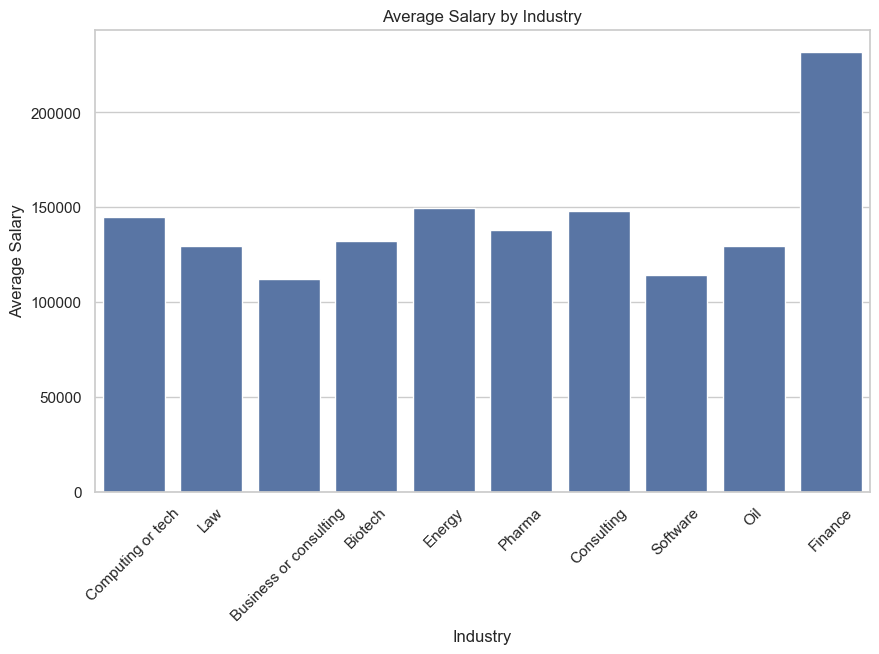

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


average_salaries = responses.groupby(by=['industry'])['converted_salary'].mean()
top_10_industries = average_salaries.sort_values(ascending=False).head(10).index
top_10_df = responses[responses['industry'].isin(top_10_industries)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="industry", y="converted_salary", data=top_10_df, estimator=np.mean, errorbar=None)
plt.title("Average Salary by Industry")
plt.xticks(rotation=45)
plt.ylabel("Average Salary")
plt.xlabel("Industry")
plt.show()